# Zillow 2017

## Package Imports <a class="anchor" id="packages_import"></a>

In [1]:
from final_zillow_functions import (find_model_scores, scale_zillow, find_baseline,
                                    train_val_test, explore_num_features,
                                    explore_bathrooms, explore_bedrooms, explore_sqft,
                                    explore_relationships, check_p_val, train_validate,
                                    wrangle_zillow, q1_stats_test, q2_stats_test,
                                    q3_stats_test, q4_stats_test, final_test,
                                    explore_value_loc, explore_counties, sales_per_month)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Acquire<a class="anchor" id="data_import"></a>

* Data came from Codeup's SQL server who acquired it from a Kaggle challenge.
* Began with 52441 observations and 4 features.

* Acquired on 1/19/2023
* Observation = single family house sold in 2017.
* Column = feature of the house that was sold.

## Prepare <a class="anchor" id="prepare"></a>

* Finished with: 50185 observations and 15 features.
* Dropped 2256 observations due to null or outlier values.
* Removed outliers that were greater than the .99 quantile.

### Data Dictionary

Please see the readme or https://www.kaggle.com/c/zillow-prize-1 for more information.

In [2]:
data_dic = pd.read_excel('zillow_data_dictionary.xlsx')
data_dic.iloc[[3, 4, 8, 11, 17, 21, 23, 25, 26, 30, 51]]

,Feature,Description
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home
8,'decktypeid',Type of deck (if any) present on parcel
11,'calculatedfinishedsquarefeet',Calculated total finished living area of the ...
17,'fips',Federal Information Processing Standard code ...
21,'garagecarcnt',Total number of garages on the lot including ...
23,'hashottuborspa',Does the home have a hot tub or spa
25,'latitude',Latitude of the middle of the parcel multipli...
26,'longitude',Longitude of the middle of the parcel multipl...
30,'poolcnt',Number of pools on the lot (if any)


In [3]:
#Get the data from the SQL server and do a bit of cleaning
df = wrangle_zillow()
len(df)

50185

## Explore process <a class="anchor" id="explore1"></a>

* Spearman's R was used due to right skewed distributions.
* All statistics test used a 95% significance level (alpha = 0.05)

In [4]:
#Splits data
train, val, test = train_validate(df)

### Question 1 <a class="anchor" id="q_1"></a>

#### Is there a relationship between a house's square footage and it's value?

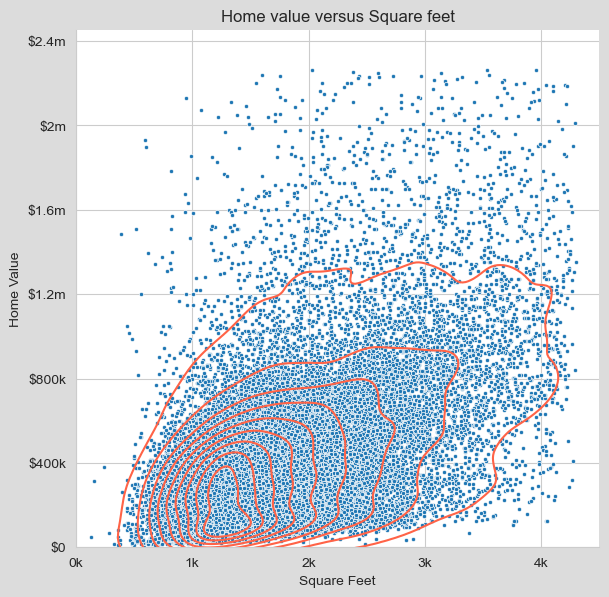

In [5]:
#Shows visuals for square footage versus value
explore_sqft(train)

#### Q1 Statistical Test <a class="anchor" id="q_1_stats"></a>

- H0: Square feet and tax value are independent variables.
- HA: Square feet and tax value have a relationship.

In [6]:
#Runs stats test
q1_stats_test(train)

We have evidence to reject the null hypothesis.
Square feet and tax value have a relationship.
Significance level of: 0.4788


### Question 2 <a class="anchor" id="q_2"></a>

#### Does the number of bedrooms affect the value of a house?

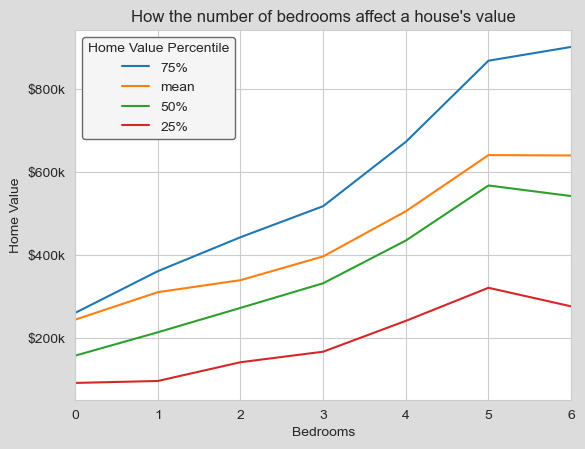

In [7]:
#Shows visuals for bedrooms versus value
explore_bedrooms(train)

#### Q2 Statistical Test <a class="anchor" id="q_2_stats"></a>

- H0: Bedroom count and tax value are independent variables.
- HA: Bedroom count and tax value have a relationship.

In [8]:
#Runs stats test
q2_stats_test(train)

We have evidence to reject the null hypothesis.
Bedrooms feet and tax value have a relationship.
Significance level of: 0.2443


### Question 3 <a class="anchor" id="q_3"></a>

#### Does the number of bathrooms affect the value of a house?

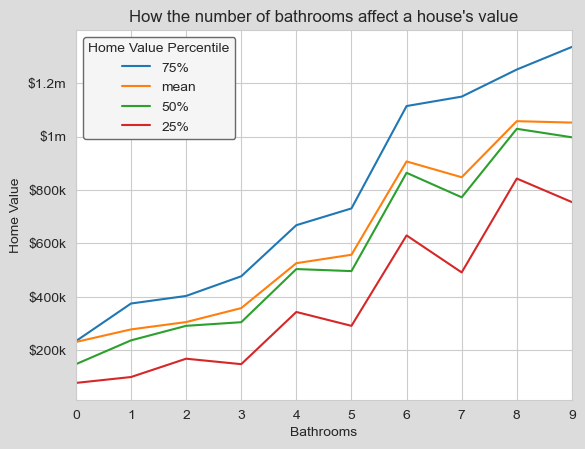

In [9]:
#Shows visual for bathrooms verus value
explore_bathrooms(train)

#### Q3 Statistical Test <a class="anchor" id="q_3_stats"></a>

- H0: Bathroom count and tax value are independent variables.
- HA: Bathroom count and tax value have a relationship.

In [10]:
#Runs stats test
q3_stats_test(train)

We have evidence to reject the null hypothesis.
Number of bathrooms and home value have a relationship.
Significance level of: 0.4354


### Question 4 <a class="anchor" id="q_4"></a>

#### Does the number of features affect the value of a home?

Features:
- Pool
- Spa/Hot tub
- Deck
- Garage

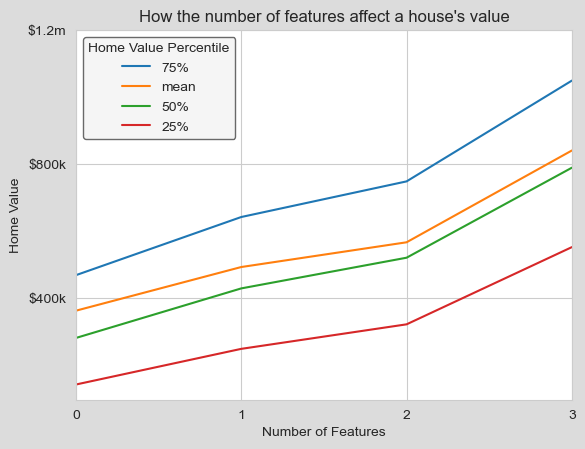

In [11]:
#Shows visuals for the number of features versus value
explore_num_features(train)

#### Q4 Statistical Test <a class="anchor" id="q_4_stats"></a>

- H0: Feature count and tax value are independent variables.
- HA: Feature count and tax value have a relationship.

In [12]:
#Runs stats test
q4_stats_test(train)

We have evidence to reject the null hypothesis.
Number of features and home value have a relationship.
Significance level of: 0.2836


## Explore summary <a class="anchor" id="explore2"></a>

- Square footage and home value have a positive linear relationship. Significance level of: 0.4788
- Bedrooms and home value have a positive linear relationship. Significance level of: 0.2443
- Bathrooms and home value have a positive linear relationship. Significance level of: 0.4354.
- Number of features and home value have a positive linear relationship. Significance level of: 0.2836.

## Modeling <a class="anchor" id="modeling"></a>

RMSE baseline: 349,233
**********************************
        Model  RMSE on Train  RMSE on Validate  Difference
0  OLS Linear       280467.0          280286.0       181.0
1  Lasso Lars       280470.0          280280.0       190.0
2     Tweedie       284495.0          281784.0      2711.0
3  Polynomial       280467.0          280288.0       179.0


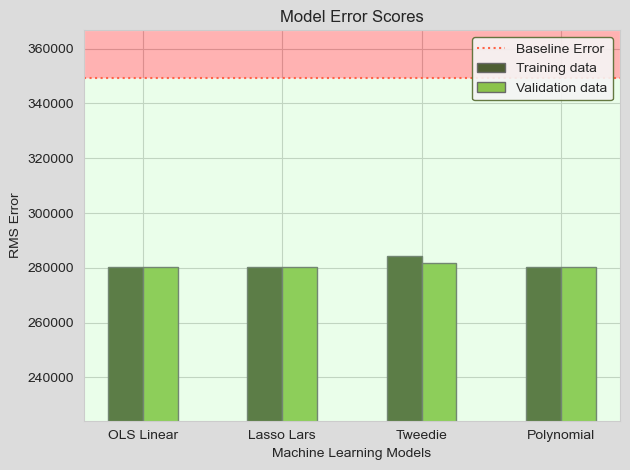

In [13]:
#Runs, fits and measures machine learning models with test and validate data
find_model_scores(df)

### Lasso Lars scored the best on the validate set

RMSE baseline: 349,233
**********************************
        Model  RMSE on Train  RMSE on Validate  RMSE on Test
0  Lasso Lars       280470.0          280280.0      286891.0


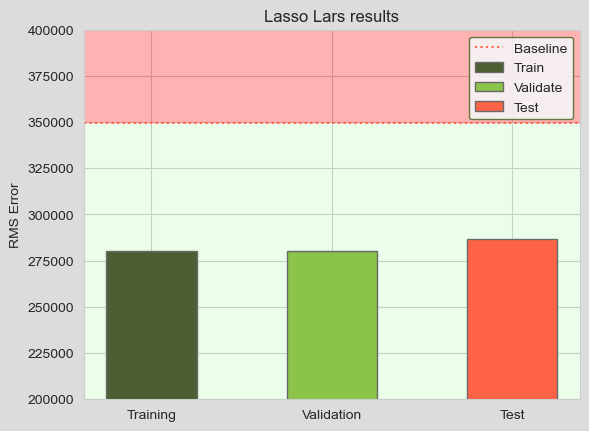

<Figure size 400x400 with 0 Axes>

In [14]:
#Takes best performing machine learning model and measures performance against all data sets
final_test(df)

## Conclusion <a class="anchor" id="conclusion"></a>

- OLS Linear and Polynomial models performed well on the training and validate data.
- Lasso Lars performed well on the train, validation and test data sets.

### Summery <a class="anchor" id="c_summery"></a>

- The number of bedrooms, bathrooms, features and square footage all have a positive linear relationship with home value.
- Bathrooms and square footage are the strongest drivers of home value.
- Lasso Lars performed well on the train, validation and test data sets. RMSE of 286,891.

### Recommendations <a class="anchor" id="c_recs"></a>

- Zillow makes 6 of their 8 billion dollars annual from property sales.
- 6% commission.

- Create 'Zillow Pages™' of locally available resources to improve your home.
- Targeted advertising to perform home improvements during the fall and winter.

**"If you are planning to sell, improve your homes now."**

- Aligns the incentives of Zillow and home owners:
    - sell quickly
    - best price
- Could target areas with higher property values. Less affected by high interest rates.

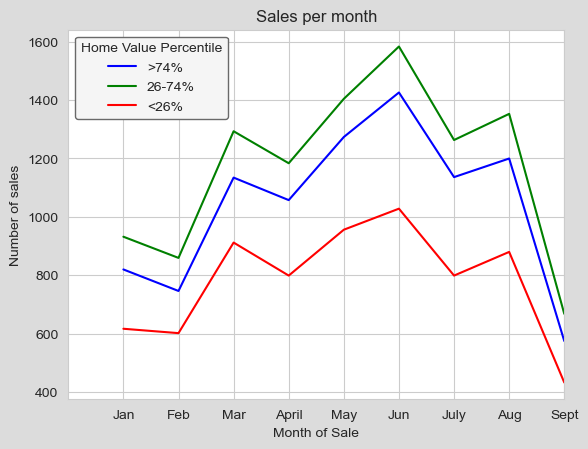

In [15]:
#Shows sales per month for each percentile of homes
sales_per_month(train)

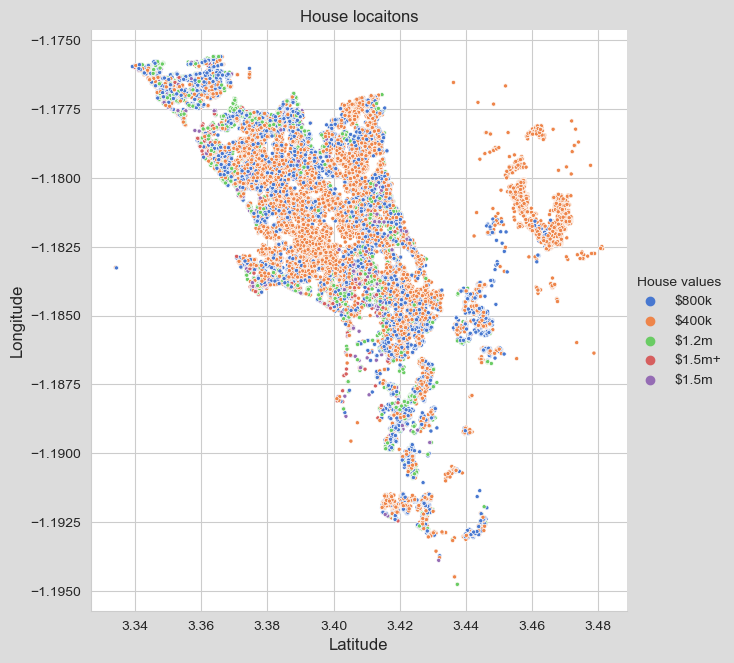

In [16]:
#Function to show clusters of homes with similar values.
explore_value_loc(train)

### Next Steps <a class="anchor" id="c_steps"></a>

- Explore location based modeling
- Time series analysis on when sales occure
    - No sales were listed for Sept, Oct, Nov or Dec.
- A function to automatically map fips to county and state locations

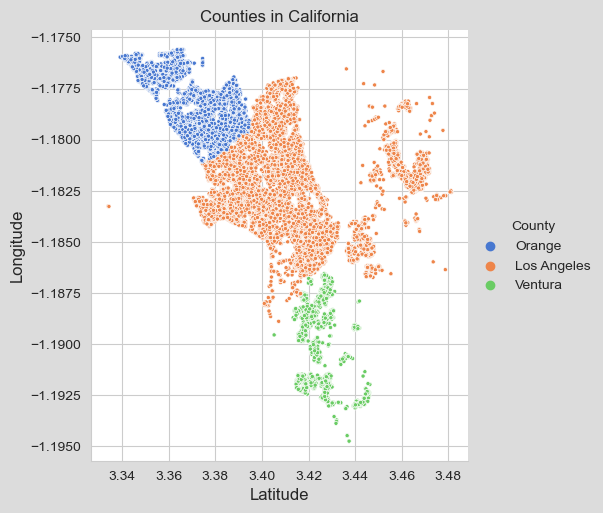

In [17]:
#Shows fips mapped to counties
explore_counties(train)